In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
data=pd.read_excel("Data Sheet.xlsx")
x=data.iloc[:,1:]
y=data.iloc[:,:1]
l=['Gender','Vehicle_Type','Road_Type','Alcohol_Consumption','Crash_Type','Seatbelt_Usage','Road_Surface_Condition']
for i in l:
    print(i,data[i].unique())

Gender ['Male' 'Female']
Vehicle_Type ['Heavy Vehicle' 'Car' 'T.W']
Road_Type ['Urban' 'Rural']
Alcohol_Consumption ['Yes' 'No']
Crash_Type ['Rear-end' 'Head-on']
Seatbelt_Usage ['No' 'Yes']
Road_Surface_Condition ['Icy' 'Dry' 'Wet']


In [76]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df=pd.DataFrame()
for i in l:
    df[i]=encoder.fit_transform(x[i])
x=x.drop(l,axis='columns')
x=pd.concat([x,df],axis='columns')


In [77]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

C:\Users\vepad\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [79]:
knn.score(x_train,y_train)

0.5888888888888889

In [26]:
x_train.shape

(240, 13)

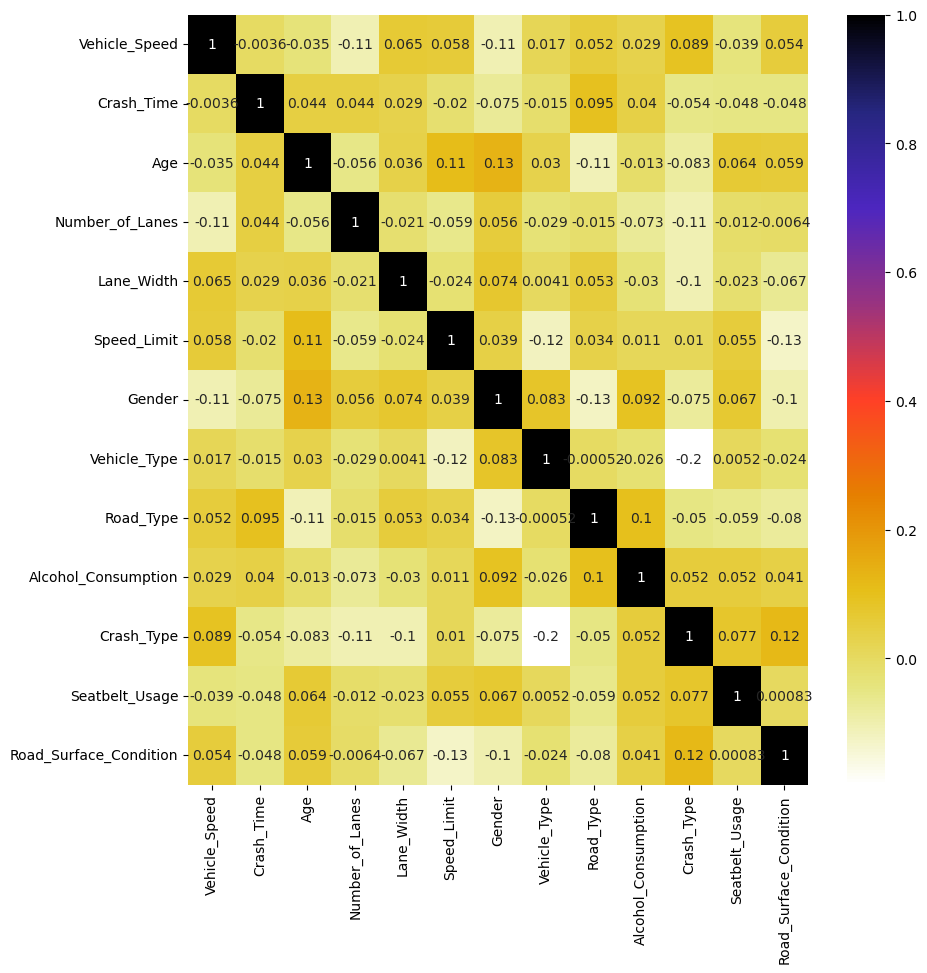

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert x_train to a DataFrame
x_train_df = pd.DataFrame(x_train)

# Calculate the correlation matrix
cor = x_train_df.corr()
column_names=['Vehicle_Speed', 'Crash_Time', 'Age', 'Number_of_Lanes', 'Lane_Width',
       'Speed_Limit', 'Gender', 'Vehicle_Type', 'Road_Type',
       'Alcohol_Consumption', 'Crash_Type', 'Seatbelt_Usage',
       'Road_Surface_Condition']
# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r,xticklabels=column_names, yticklabels=column_names)
plt.show()


In [31]:
cor_features

NameError: name 'cor_features' is not defined

In [29]:
pd.DataFrame(x_train).columns

RangeIndex(start=0, stop=13, step=1)

In [53]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [54]:
for train_index,test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index,test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [56]:
def get_score(x_train,x_test,y_train,y_test):
    knn.fit(x_train,y_train)
    knn.score(x_test,y_test)

In [57]:
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=10)

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.45

In [84]:
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=10)
model=DecisionTreeClassifier()
scores=cross_val_score(model,x,y,cv=folds)
print(np.mean(scores))

NameError: name 'cross_val_score' is not defined

In [86]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
model=DecisionTreeClassifier()
kfold_validation=KFold(10)
results=cross_val_score(model,x,y,cv=kfold_validation)
print(results)

[0.33333333 0.26666667 0.26666667 0.4        0.1        0.36666667
 0.36666667 0.23333333 0.36666667 0.26666667]


In [93]:
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=10)
scores=cross_val_score(knn,x,y,cv=folds)
print(np.mean(scores))

0.3466666666666666


C:\Users\vepad\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\vepad\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\vepad\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\vepad\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam